In [48]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]
    
    plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')
    
   # plt.show()

In [50]:
def plot_surface(est, x_1, x_2, ax=None, threshold=0.5, contourf=False):
    """Plots the decision surface of ``est`` on features ``x1`` and ``x2``. """
    xx1, xx2 = np.meshgrid(np.linspace(x_1.min(), x_1.max(), 100), 
                           np.linspace(x_2.min(), x_2.max(), 100))
    
    X_pred = np.c_[xx1.ravel(), xx2.ravel(), xx1.ravel()**2, xx2.ravel()**2, xx1.ravel()*xx2.ravel()]#, xx1.ravel()**3, xx2.ravel()**3]
    
    if hasattr(est, 'predict_proba'):  
        pred = est.predict_proba(X_pred)[:, 1]
    else:
        pred = est.predict(X_pred)
    Z = pred.reshape((100, 100))  # reshape seq to grid
    if ax is None:
        ax = plt.gca()
    ax.contour(xx1, xx2, Z, levels=[threshold], colors='black')
    ax.set_xlim((x_1.min(), x_1.max()))
    ax.set_ylim((x_2.min(), x_2.max()))
    plt.show()

In [74]:
df = pd.read_csv('testsCom.csv')
X, y = df[["test1", "test2", "test1test1", "test2test2", "test1test2"]], df['passed']

In [75]:
print(X.shape, y.shape)

(118, 5) (118,)


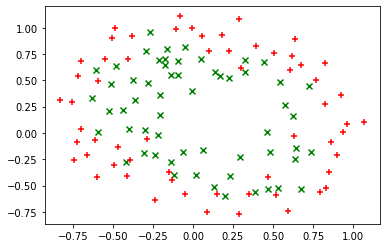

In [76]:
plot_data(X, y)

In [77]:
clf = LogisticRegression()
#clf = LogisticRegression(solver='lbfgs')
#clf = LogisticRegression(solver='lbfgs', max_iter=100000, tol=1e-10)
clf = clf.fit(X, y)

In [83]:
y_pred = clf.predict(X)
print(y_pred.shape)

(118,)


In [84]:
y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [85]:
accuracy_score(y, y_pred)

0.8135593220338984

In [86]:
X_test = np.array([[40, 40], [60, 65]])
poly = PolynomialFeatures(2)
X_test = poly.fit_transform(X_test)
X_test = X_test[:, 1:]

In [87]:
y_test = clf.predict(X_test)

C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [88]:
y_test

array([0, 0], dtype=int64)

In [89]:
X_test

array([[  40.,   40., 1600., 1600., 1600.],
       [  60.,   65., 3600., 3900., 4225.]])

C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


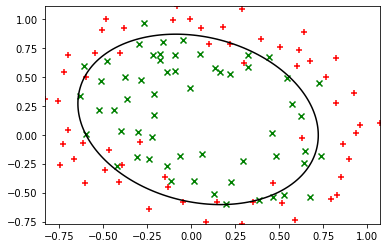

        test1     test2  test1test1  test2test2  test1test2
0   -0.092742  0.684940    0.008601    0.469143   -0.063523
1    0.051267  0.699560    0.002628    0.489384    0.035864
2   -0.213710  0.692250    0.045672    0.479210   -0.147941
3   -0.375000  0.502190    0.140625    0.252195   -0.188321
4   -0.513250  0.465640    0.263426    0.216821   -0.238990
..        ...       ...         ...         ...         ...
113 -0.720620  0.538740    0.519293    0.290241   -0.388227
114 -0.484450  0.999270    0.234692    0.998541   -0.484096
115 -0.006336  0.999270    0.000040    0.998541   -0.006332
116  0.632650 -0.030612    0.400246    0.000937   -0.019367
117 -0.593890  0.494880    0.352705    0.244906   -0.293904

[118 rows x 5 columns]


In [92]:
plot_data(X, y)
plot_surface(clf, X.iloc[:, 0], X.iloc[:, 1])
print(X)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

In [67]:
clf = LogisticRegression(solver='lbfgs', max_iter=100000, tol=1e-10)
clf = clf.fit(X_train, y_train)

In [68]:
y_train_pred = clf.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.7872340425531915

In [69]:
y_test_pred = clf.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.7083333333333334

In [70]:
print(X_train.shape)
print(X_test.shape)

(94, 5)
(24, 5)


C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


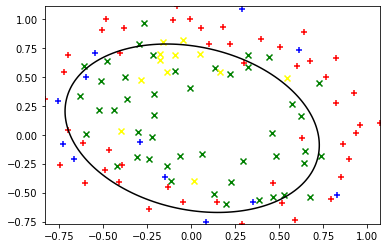

In [71]:
plot_data(X_train, y_train)
plot_data(X_test, y_test, True)
plot_surface(clf, X.iloc[:, 0], X.iloc[:, 1])